# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#print map of api call
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + "Tempe"

# Run request
response = requests.get(url)
resp_data = response.json()

# Print the json (pretty printed)
print(json.dumps(resp_data, indent=4, sort_keys=False))    

{
    "coord": {
        "lon": -111.9093,
        "lat": 33.4148
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 294.21,
        "feels_like": 292.97,
        "temp_min": 291.68,
        "temp_max": 296.46,
        "pressure": 1013,
        "humidity": 23
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.06,
        "deg": 100
    },
    "clouds": {
        "all": 20
    },
    "dt": 1680110332,
    "sys": {
        "type": 2,
        "id": 2077260,
        "country": "US",
        "sunrise": 1680095963,
        "sunset": 1680140713
    },
    "timezone": -25200,
    "id": 5317058,
    "name": "Tempe",
    "cod": 200
}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(city_url)
        city_weather = city_weather_json.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | vostok
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | trofors
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | skjervoy
Processing Record 15 of Set 1 | santa vitoria do palmar
Processing Record 16 of Set 1 | farmington
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | namatanai
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1

Processing Record 34 of Set 4 | lasa
Processing Record 35 of Set 4 | isangel
Processing Record 36 of Set 4 | broome
Processing Record 37 of Set 4 | husavik
Processing Record 38 of Set 4 | aklavik
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | hovd
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | elko
Processing Record 43 of Set 4 | fukuma
Processing Record 44 of Set 4 | mareeba
Processing Record 45 of Set 4 | maldonado
Processing Record 46 of Set 4 | quang ngai
Processing Record 47 of Set 4 | dolores
Processing Record 48 of Set 4 | orito
Processing Record 49 of Set 4 | yar-sale
Processing Record 0 of Set 5 | wanxian
Processing Record 1 of Set 5 | kloulklubed
Processing Record 2 of Set 5 | maki
Processing Record 3 of Set 5 | magadan
Processing Record 4 of Set 5 | roebourne
Processing Record 5 of Set 5 | kautokeino
Processing Record 6 of Set 5 | new port richey
Processing Record 7 of Set 5 | havelock
Processing Record 8 of Set 5 | los 

Processing Record 23 of Set 8 | iqaluit
Processing Record 24 of Set 8 | inskoy
Processing Record 25 of Set 8 | havre
Processing Record 26 of Set 8 | marovoay
Processing Record 27 of Set 8 | cidreira
Processing Record 28 of Set 8 | tigil
Processing Record 29 of Set 8 | voh
Processing Record 30 of Set 8 | asfi
Processing Record 31 of Set 8 | daru
Processing Record 32 of Set 8 | tiquicheo
Processing Record 33 of Set 8 | gazojak
Processing Record 34 of Set 8 | monte alegre
Processing Record 35 of Set 8 | bontang
Processing Record 36 of Set 8 | kamaishi
Processing Record 37 of Set 8 | martapura
Processing Record 38 of Set 8 | denison
Processing Record 39 of Set 8 | nan
Processing Record 40 of Set 8 | macamic
Processing Record 41 of Set 8 | baker city
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | maracacume
Processing Record 44 of Set 8 | constantine
Processing Record 45 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 46 of Set 8 | flin flon

Processing Record 11 of Set 12 | omsukchan
Processing Record 12 of Set 12 | acapulco
Processing Record 13 of Set 12 | sukhumi
Processing Record 14 of Set 12 | soyo
Processing Record 15 of Set 12 | thinadhoo
Processing Record 16 of Set 12 | poum
Processing Record 17 of Set 12 | antofagasta
Processing Record 18 of Set 12 | comodoro rivadavia
Processing Record 19 of Set 12 | hirara
Processing Record 20 of Set 12 | miguel auza
Processing Record 21 of Set 12 | gwadar
Processing Record 22 of Set 12 | oktyabrskiy
Processing Record 23 of Set 12 | nalut
Processing Record 24 of Set 12 | bardiyah
Processing Record 25 of Set 12 | nizhneangarsk
Processing Record 26 of Set 12 | shebunino
Processing Record 27 of Set 12 | el balyana
City not found. Skipping...
Processing Record 28 of Set 12 | la asuncion
Processing Record 29 of Set 12 | bakal
Processing Record 30 of Set 12 | songjianghe
Processing Record 31 of Set 12 | liverpool
Processing Record 32 of Set 12 | igrim
Processing Record 33 of Set 12 | a

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,17.74,58,80,6.77,AU,1680110099
1,vostok,46.4856,135.8833,-1.16,79,60,2.86,RU,1680110489
2,kapaa,22.0752,-159.3190,24.18,90,75,5.14,US,1680110168
3,albany,42.6001,-73.9662,11.13,38,40,0.89,US,1680110069
4,rikitea,-23.1203,-134.9692,26.39,72,89,2.05,PF,1680109791


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,17.74,58,80,6.77,AU,1680110099
1,vostok,46.4856,135.8833,-1.16,79,60,2.86,RU,1680110489
2,kapaa,22.0752,-159.3190,24.18,90,75,5.14,US,1680110168
3,albany,42.6001,-73.9662,11.13,38,40,0.89,US,1680110069
4,rikitea,-23.1203,-134.9692,26.39,72,89,2.05,PF,1680109791


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

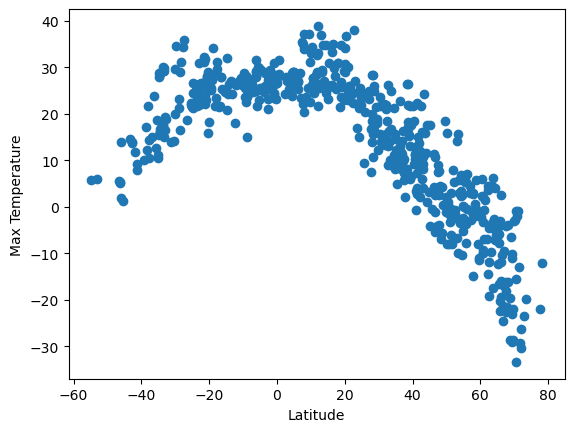

<Figure size 640x480 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. temperature
# city_data_df.plot(kind='scatter', x='Lat', y='Max Temp')
# plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

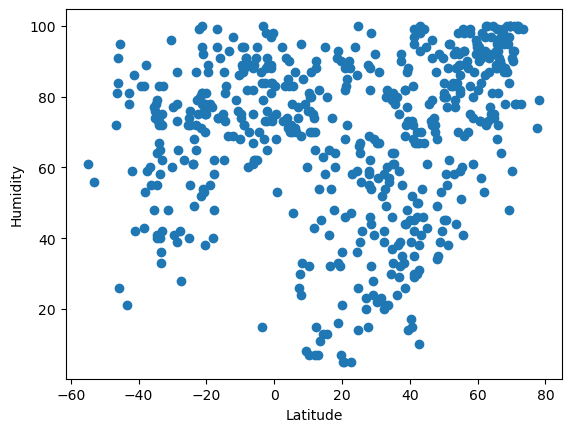

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
# city_data_df.plot(kind='scatter', x='Lat', y='Humidity')
# plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

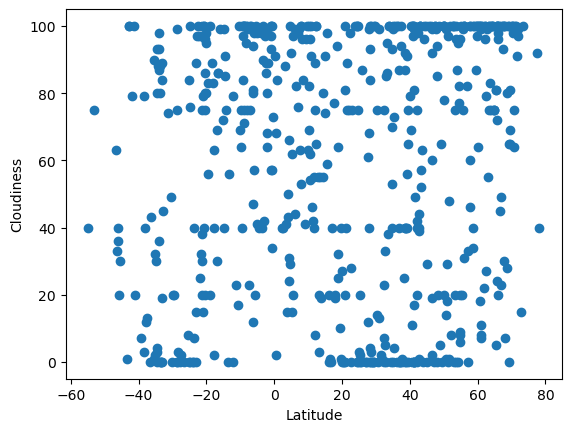

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness')
# plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

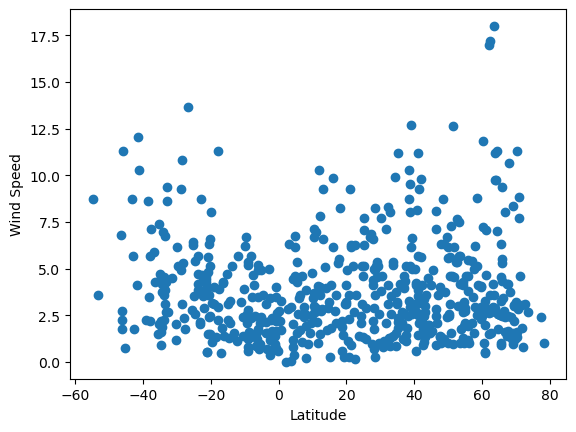

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
# city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed')

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #plotting 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")    
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vostok,46.4856,135.8833,-1.16,79,60,2.86,RU,1680110489
2,kapaa,22.0752,-159.3190,24.18,90,75,5.14,US,1680110168
3,albany,42.6001,-73.9662,11.13,38,40,0.89,US,1680110069
5,butaritari,3.0707,172.7902,26.92,83,88,6.33,KI,1680110058
6,upernavik,72.7868,-56.1549,-23.44,78,15,3.13,GL,1680110132


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,17.74,58,80,6.77,AU,1680110099
4,rikitea,-23.1203,-134.9692,26.39,72,89,2.05,PF,1680109791
9,atuona,-9.8000,-139.0333,27.05,75,64,6.21,PF,1680110091
10,port elizabeth,-33.9180,25.5701,17.28,73,87,3.58,ZA,1680110123
14,santa vitoria do palmar,-33.5189,-53.3681,30.07,36,0,3.86,BR,1680110495


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8996732613318685


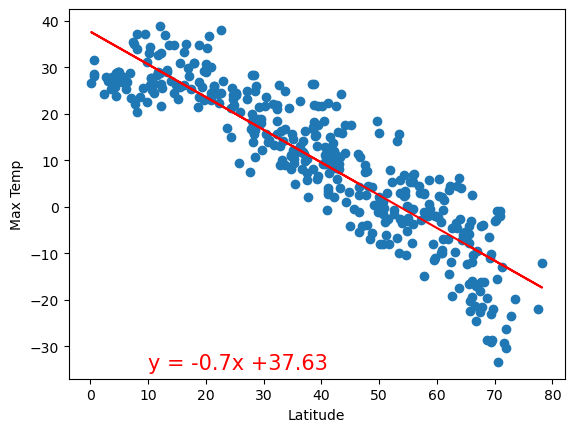

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Max Temp",(10,-35))


The r-value is: 0.6455160173287772


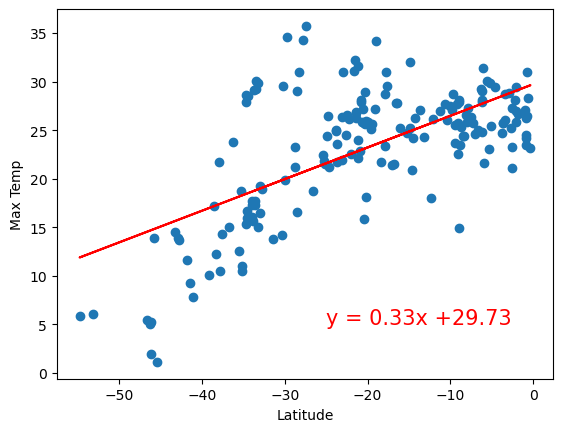

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, "Max Temp",(-25,5))

**Discussion about the linear relationship:** 
Calculating the linear regression and r values for latitude and maximum temperature shows a significant relationship between the latitude of a city or location and the max temps that city will experience in the northern hemisphere. For the southern hemisphere a moderate to strong correlation is detected. As the measurement increases (+) or decreases (-) from zero (the equator), the maximum temperatures decrease. Stated another way, the above two linear regression plots show that the farther away from the equator that you travel, the lower the temperatures. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3872781632200809


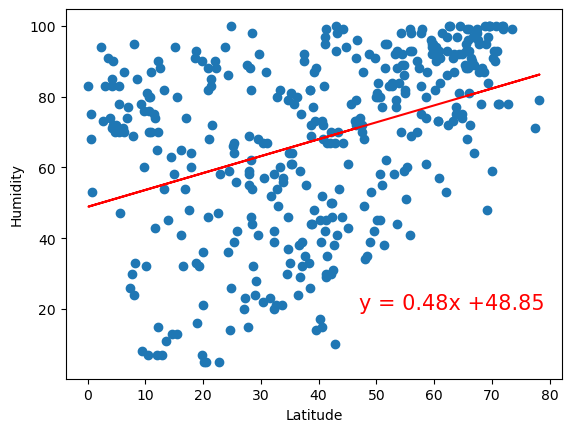

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Humidity",(47,20))

The r-value is: 0.3744611883302524


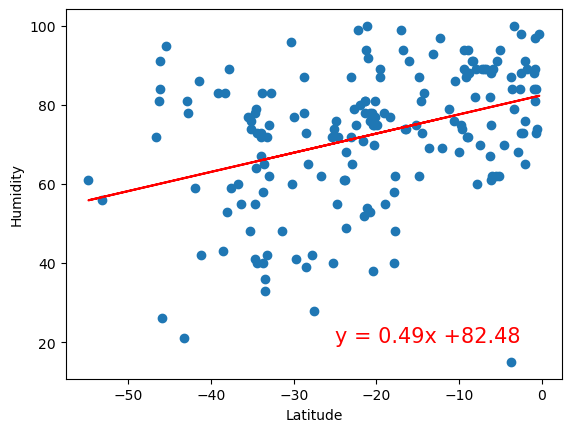

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, "Humidity",(-25,20))

**Discussion about the linear relationship:** 
The linear regression plots and r value calculations for latitude and humidity show a weak relationship between the two. As one moves further away from the equator (latitude of 0) there is some likelihood that the humidity will decrease. Stated another way, the closer you are to the equator, the higher the humidity in many locations. There are many instances where local geography will influence the micro climate of an area, which is indicated by an absence of strong correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17315846142034336


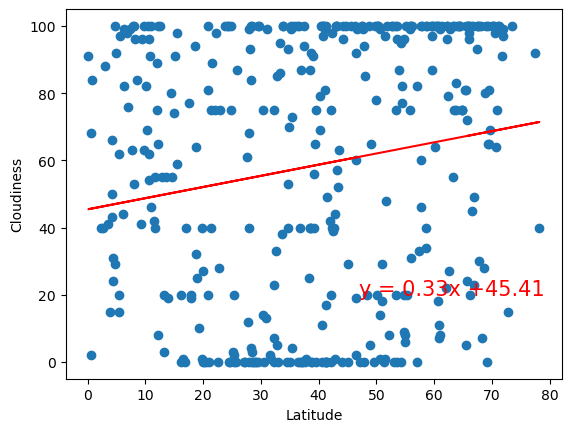

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Cloudiness",(47,20))

The r-value is: 0.37726240808086414


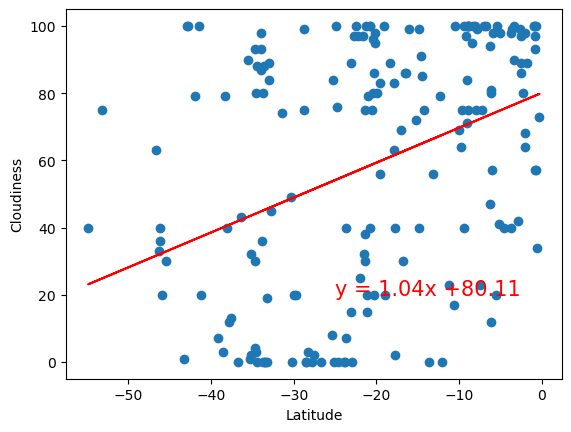

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, "Cloudiness",(-25,20))

**Discussion about the linear relationship:** Based on the linear regression calculations and the r values for latitude and cloudiness it seems there is no correlation between the two for the northern hemisphere and a weak correlation between the two for the southern hemisphere. In the southern hemisphere it seems as you get farther away from the equator the less cloudy it is, some of the time

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09849692628194462


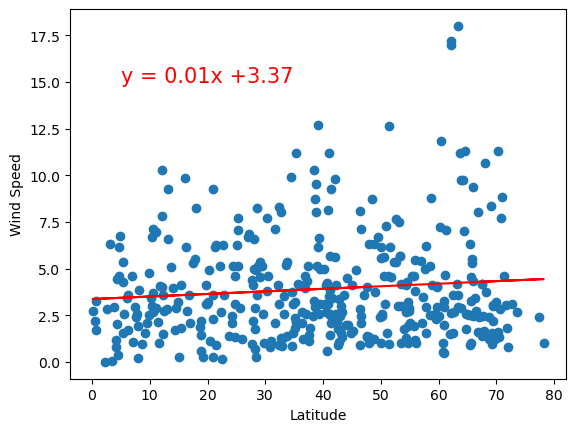

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Wind Speed",(5,15))

The r-value is: -0.3998195957988085


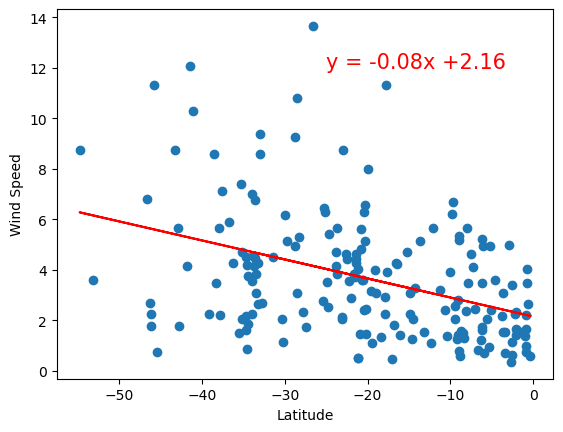

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, "Wind Speed",(-25,12))

**Discussion about the linear relationship:** 
The linear regression models for latitude and wind speed for the northern hemisphere show no correlation or relationship. For the southern hemisphere there is weak correlation that indicates as you get farther from the equator the higher the wind speed. 